# --- 1. Installing libraries ---


In [64]:
!pip install pandas scikit-learn matplotlib seaborn joblib

In [65]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import os

# Create folders if they are not
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("models", exist_ok=True)


EDA and data preparation

In [67]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [68]:
from google.colab import files
uploaded = files.upload()

# after downloading, you can read:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['products.csv']))
df.head()


Saving products.csv to products.csv


,product ID,Product Title,Merchant ID,Category Label,_Product Code,Number_of_Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023


In [69]:
import shutil
shutil.move("products.csv", "data/raw/products.csv")


'data/raw/products.csv'

In [70]:
# 2. Basic information
# -------------------------
df.info()               # data types and gaps
df.describe()           # basic statistics for numeric columns
df.isna().sum()         # number of passes by columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product ID       35311 non-null  int64  
 1   Product Title    35139 non-null  object 
 2   Merchant ID      35311 non-null  int64  
 3    Category Label  35267 non-null  object 
 4   _Product Code    35216 non-null  object 
 5   Number_of_Views  35297 non-null  float64
 6   Merchant Rating  35141 non-null  float64
 7    Listing Date    35252 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.2+ MB


,0
product ID,0
Product Title,172
Merchant ID,0
Category Label,44
_Product Code,95
Number_of_Views,14
Merchant Rating,170
Listing Date,59


In [71]:
# Remove spaces in column names
df.columns = df.columns.str.strip()


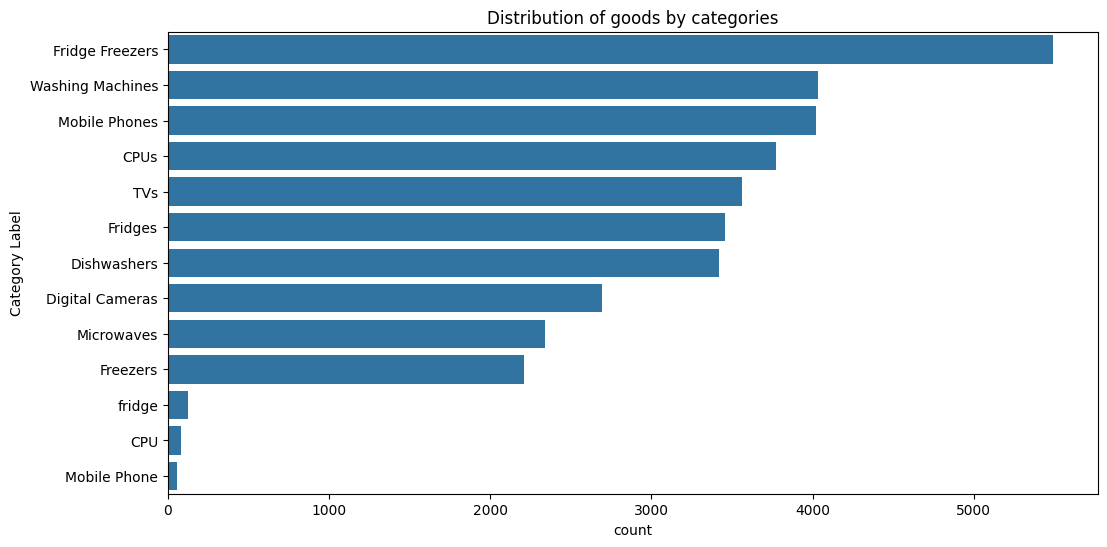

In [72]:
# 3. Category study
# -------------------------
# Distribution of goods by categories
plt.figure(figsize=(12,6))
sns.countplot(y="Category Label", data=df, order=df['Category Label'].value_counts().index)
plt.title("Distribution of goods by categories")
plt.show()


In [73]:
# 4. data scrubbing
# -------------------------
# Remove lines with missing values ​ ​ in critical columns
df = df.dropna(subset=["Product Title", "Category Label"])

# We translate the names of goods into lowercase
df["Product Title"] = df["Product Title"].str.lower()

# Remove duplicates
df = df.drop_duplicates()


In [74]:
# 5. Save prepared data
# -------------------------
os.makedirs("data/processed", exist_ok=True)
df.to_csv("data/processed/products_clean.csv", index=False)

print("Successfully cleaned up and saved to data/processed/products_clean.csv")

Successfully cleaned up and saved to data/processed/products_clean.csv


In [75]:
from google.colab import files
files.download("data/processed/products_clean.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>